# <span style="color:blue">Projeto 02 - Previsão de renda </span>

## Etapa 1 Crisp-DM: Business Understanding 
#### Objetivo do Projeto:

O objetivo do projeto é prever a renda dos indivíduos com base em diversas características demográficas e socioeconômicas. Essa previsão pode ser usada para diversas finalidades, como segmentação de clientes, análise de crédito, marketing direcionado, e políticas sociais.

#### Contexto do Negócio:

- **Setor**: O projeto se insere no setor financeiro e de análise de crédito.
- **Importância**: A capacidade de prever a renda é crucial para instituições financeiras ao avaliar o risco de crédito dos clientes. Além disso, empresas podem usar essas previsões para personalizar ofertas de produtos e serviços, melhorando a experiência do cliente e aumentando a taxa de conversão.
- **Stakeholders**: Os principais interessados incluem analistas de crédito, gerentes de produtos financeiros, equipes de marketing, e autoridades reguladoras.



## Etapa 2 Crisp-DM: Data Understanding

---

### Dicionário de dados

Um breve resumo do que veremos na base de dados trabalhada nesse projeto.


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                | Exibe a data no formato Ano-mês-dia                                       | object|
| id_cliente              | Número de identificação do cliente                                       | int64|
| sexo                    | M = 'Masculino'; F = 'Feminino                                       | object|
| posse_de_veiculo        | Indica se possui veículo ou não                                       | bool|
| posse_de_imovel         | Indica se possui imóvel ou não                                       | bool|
| qtd_filhos              | Quantidade de filhos                                       | int64|
| tipo_renda              | Tipo de renda (ex: assaliariado, autônomo etc)                                       | object|
| educacao                | Nível de educação (ex: secundário, superior etc)                                       | object|
| estado_civil            | Estado civíl (ex: Casado, Solteiro etc)                                        | object|
| tipo_residencia         | Tipo de residência (ex: casa/apartamento, com os pais etc)                                       | object|
| idade                   | Informa a idade                                       | int64|
| tempo_emprego           | Tempo de emprego em anos                                       | float64|
| qt_pessoas_residencia   | Número de indivíduos resident                                       | float64|
| mau                     | Indica se é inadimplente ou não                                       | bool|             
| renda                   | Renda do cliente                                       | float64|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split

%matplotlib inline


#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [3]:
display(renda.head(5))
print(f"Quantidade de linhas e colunas do nosso Data Frame: {renda.shape[0]} linhas e {renda.shape[1]} colunas\n")

Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    mau    renda  
0     36       3.575342                    3.0  False  3369.24  
1     42       0.860274                    2.0  False  6096.14  
2     31       8.065753                    4.0  False  5658.98  
3     50       1.208219                    2.0  False  7246.69  
4     52      13.873973                    2.0  False  4017.37

Quantidade de linhas e colunas do nosso Data Frame: 15000 linhas e 16 colunas



In [4]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [5]:
renda.describe()

Unnamed: 0         index    qtd_filhos        idade  tempo_emprego  \
count  15000.000000  15000.000000  15000.000000  15000.00000   12466.000000   
mean    7499.500000   8298.753467      0.437267     43.84140       7.750462   
std     4330.271354   4800.904442      0.760594     11.22917       6.780216   
min        0.000000      0.000000      0.000000     22.00000       0.191781   
25%     3749.750000   4111.750000      0.000000     34.00000       3.016438   
50%     7499.500000   8330.500000      0.000000     43.00000       6.016438   
75%    11249.250000  12469.000000      1.000000     53.00000      10.183562   
max    14999.000000  16649.000000     14.000000     68.00000      42.906849   

       qt_pessoas_residencia         renda  
count           15000.000000  15000.000000  
mean                2.219067   4624.632946  
std                 0.922352   4628.571729  
min                 1.000000    159.900000  
25%                 2.000000   1945.740000  
50%                 2.000000   3278.260000  
75%                 3.000000   5642.365000  
max                15.000000  89918.040000

In [6]:
renda.isna().sum()

Unnamed: 0                  0
data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [7]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
prof.to_file('./output/renda_analisys.html')

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\ydata_profiling\profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**O Pandas Profile nos diz diversas coisas super interessantes e relevantes para nossa análise. Porém gostaria de faze-las manualmente usando o python.**

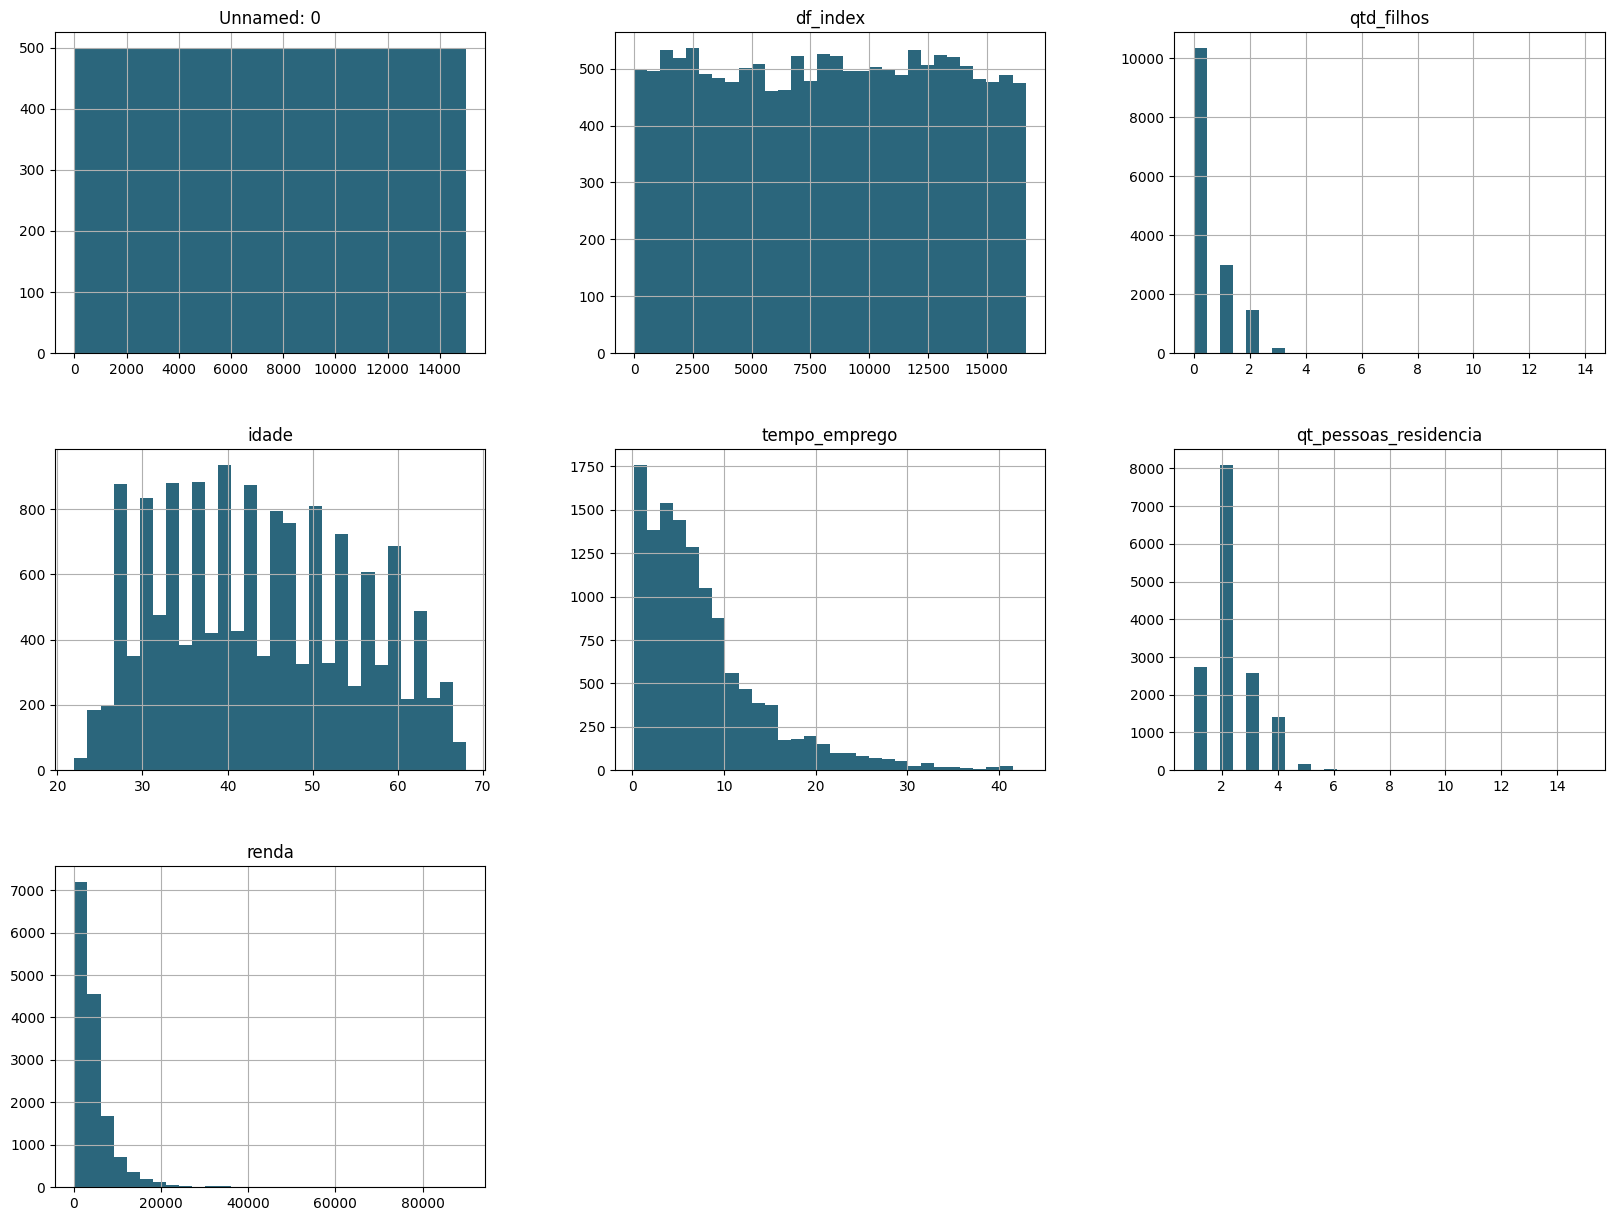

In [9]:
renda.hist(bins=30,figsize=(20,15),color='#2b667c');plt.show()

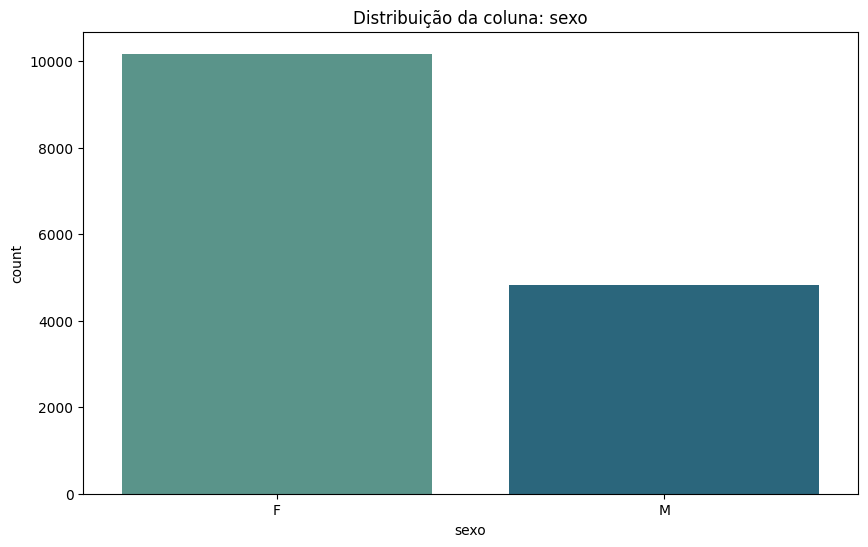

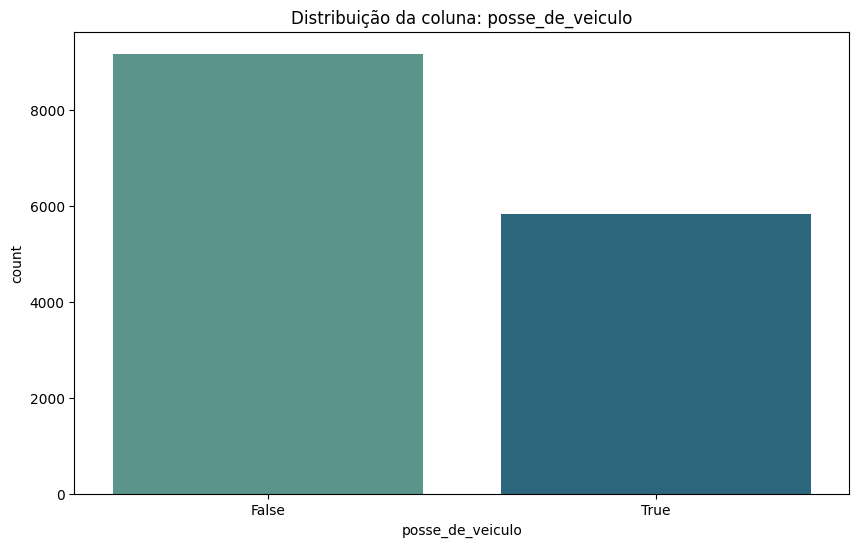

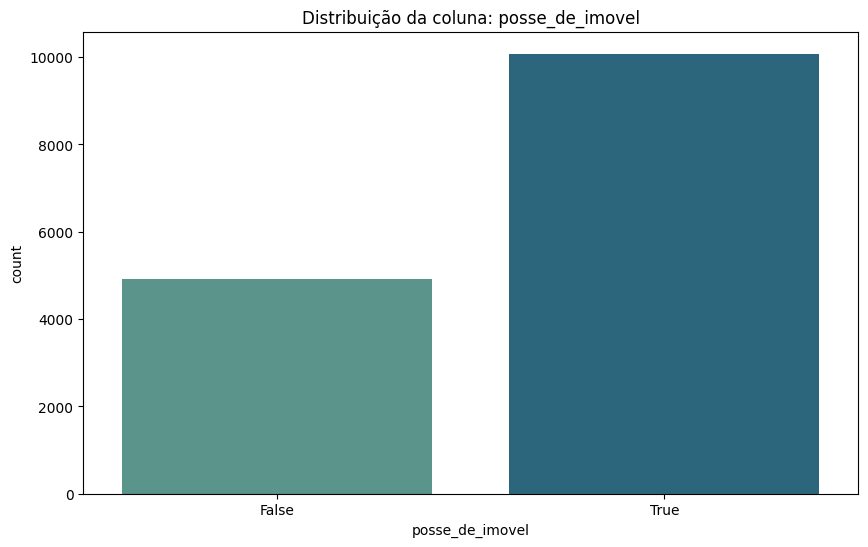

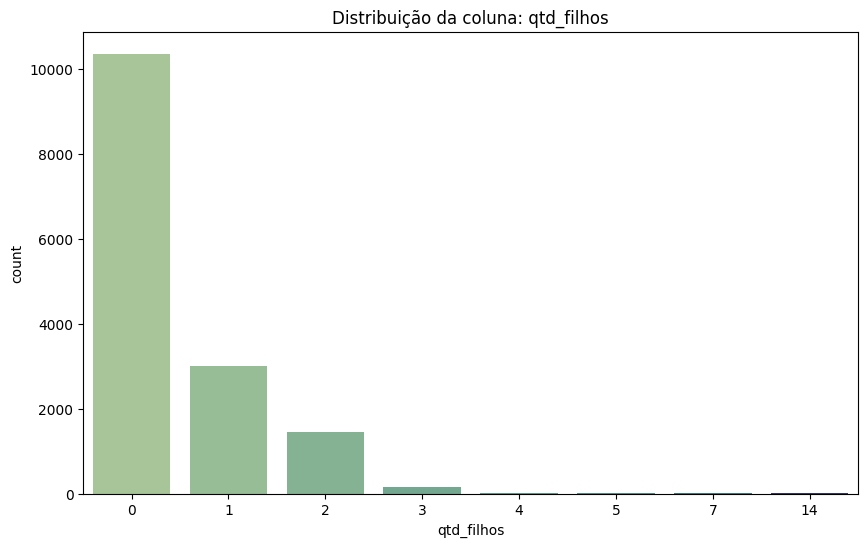

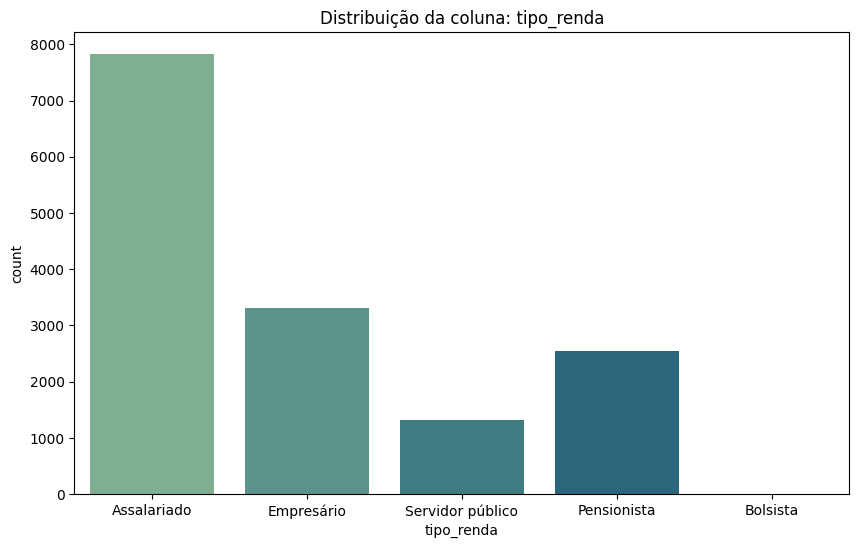

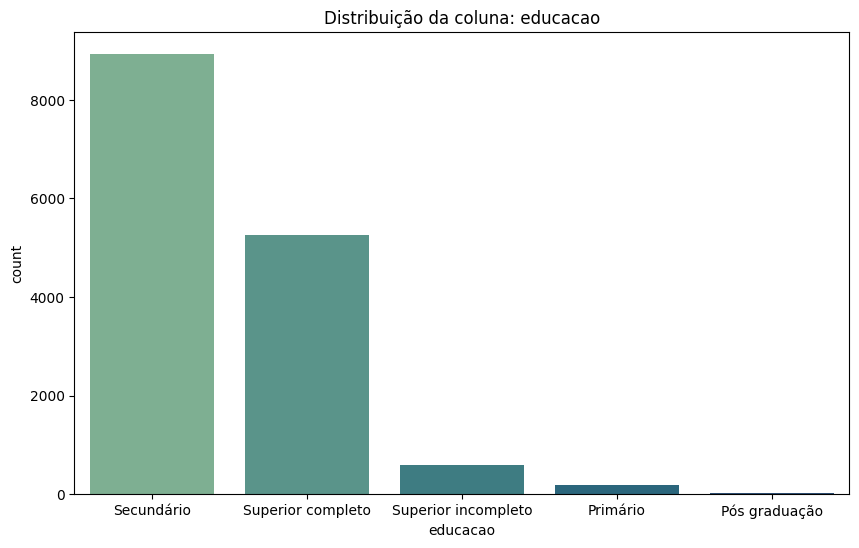

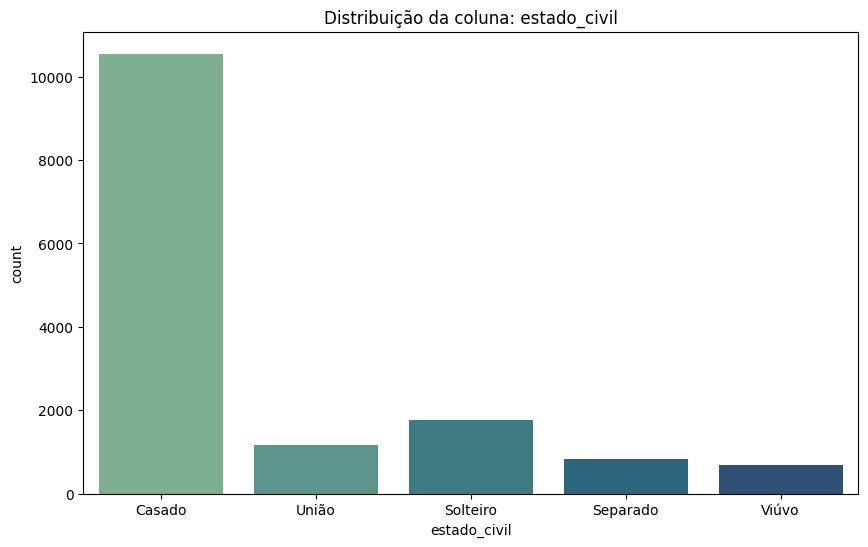

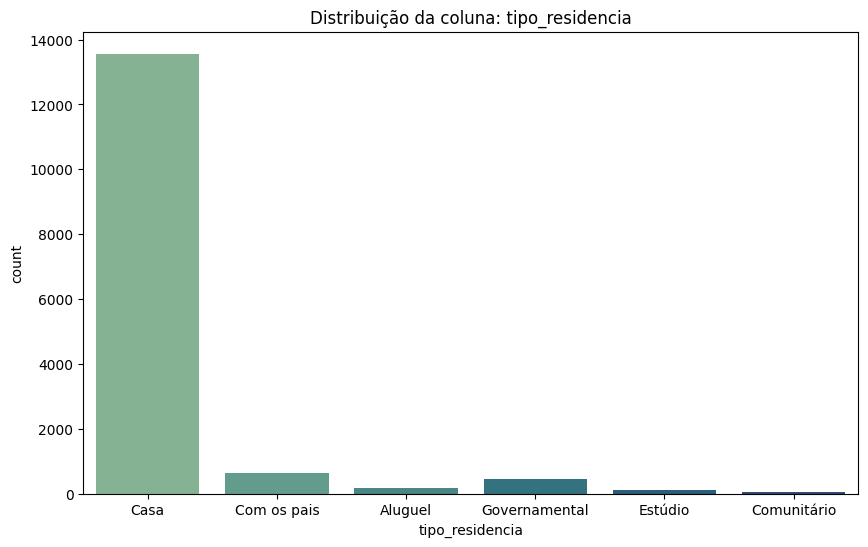

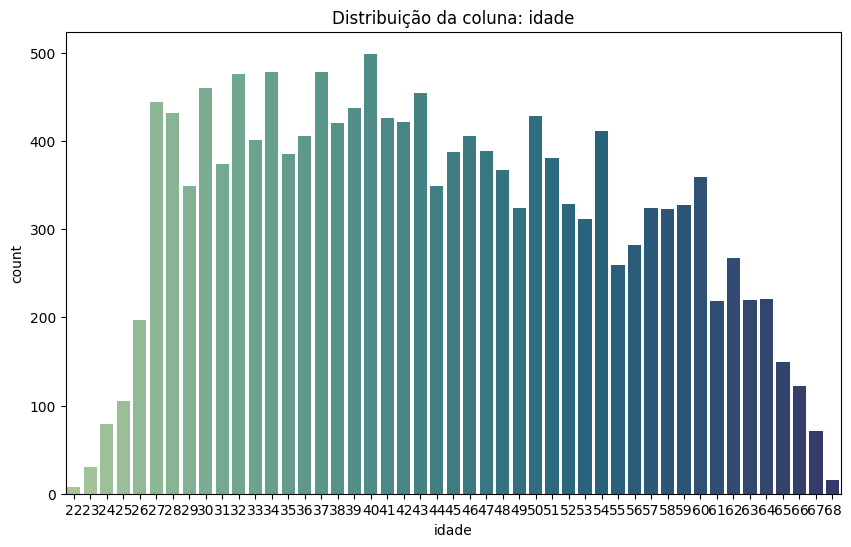

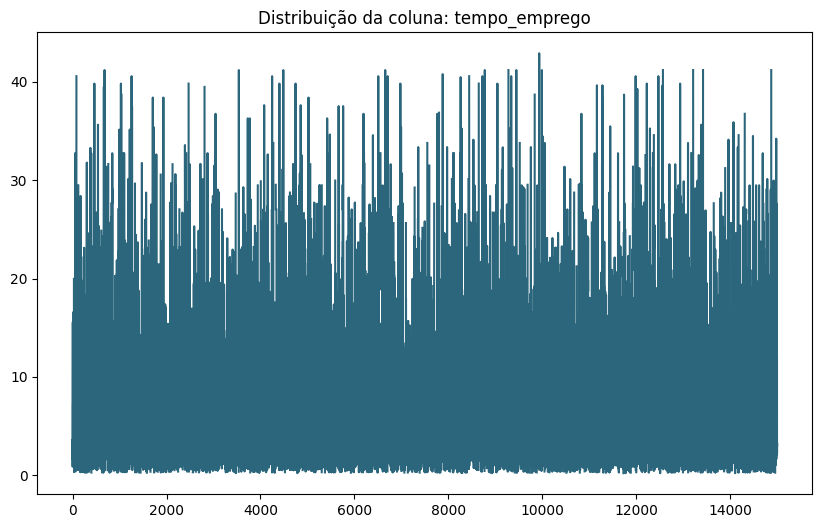

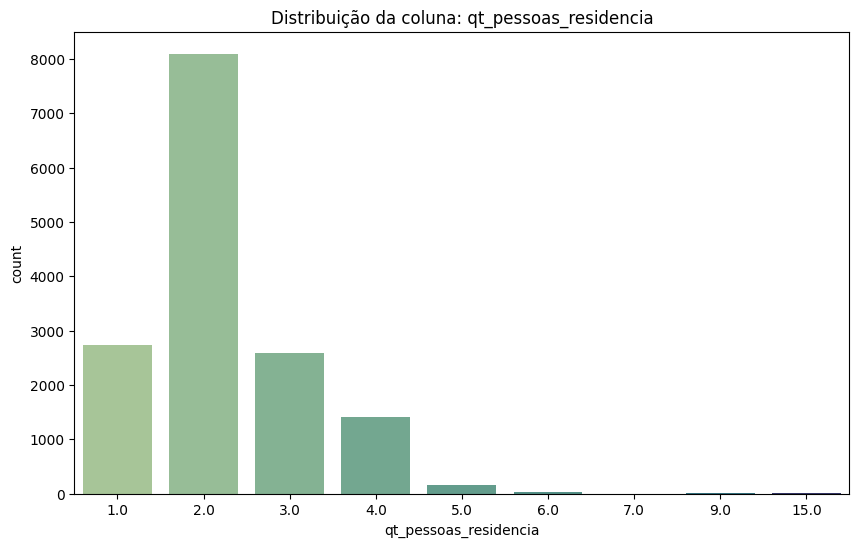

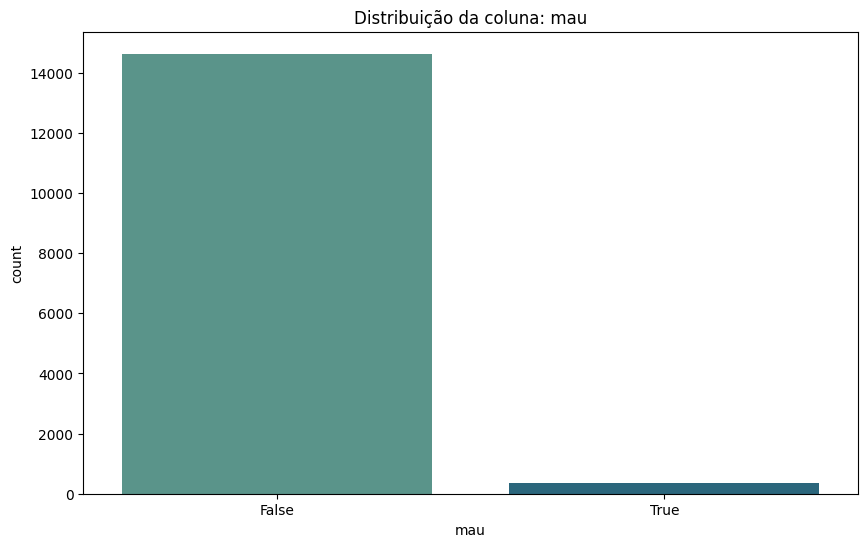

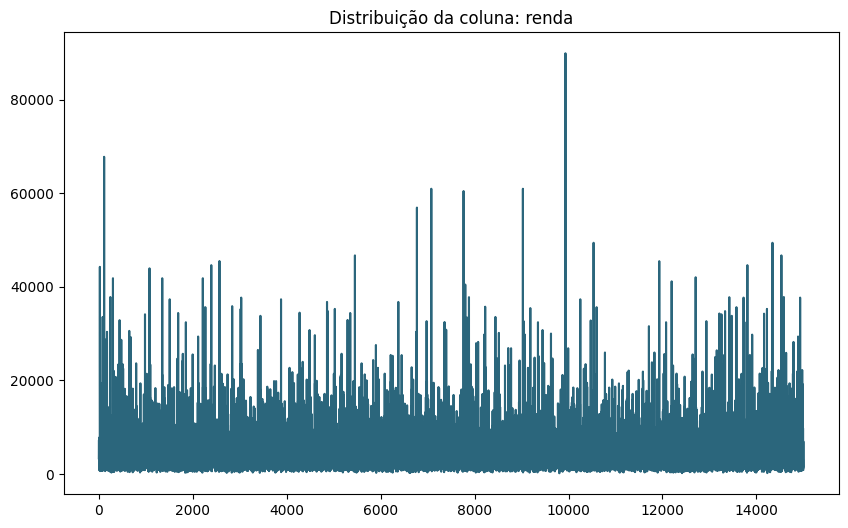

In [10]:
for row in renda.columns[3:]:
    plt.figure(figsize=(10, 6))
    if row in ['tempo_emprego','renda']:
        plt.title(f'Distribuição da coluna: {row}')
        renda[row].plot(color="#2b667c")
        
        
    else:  
        sns.countplot(data=renda, x=row, hue=row, palette="crest", legend=False)
        plt.title(f'Distribuição da coluna: {row}')
    plt.show()

### Entendimento dos dados - Bivariadas




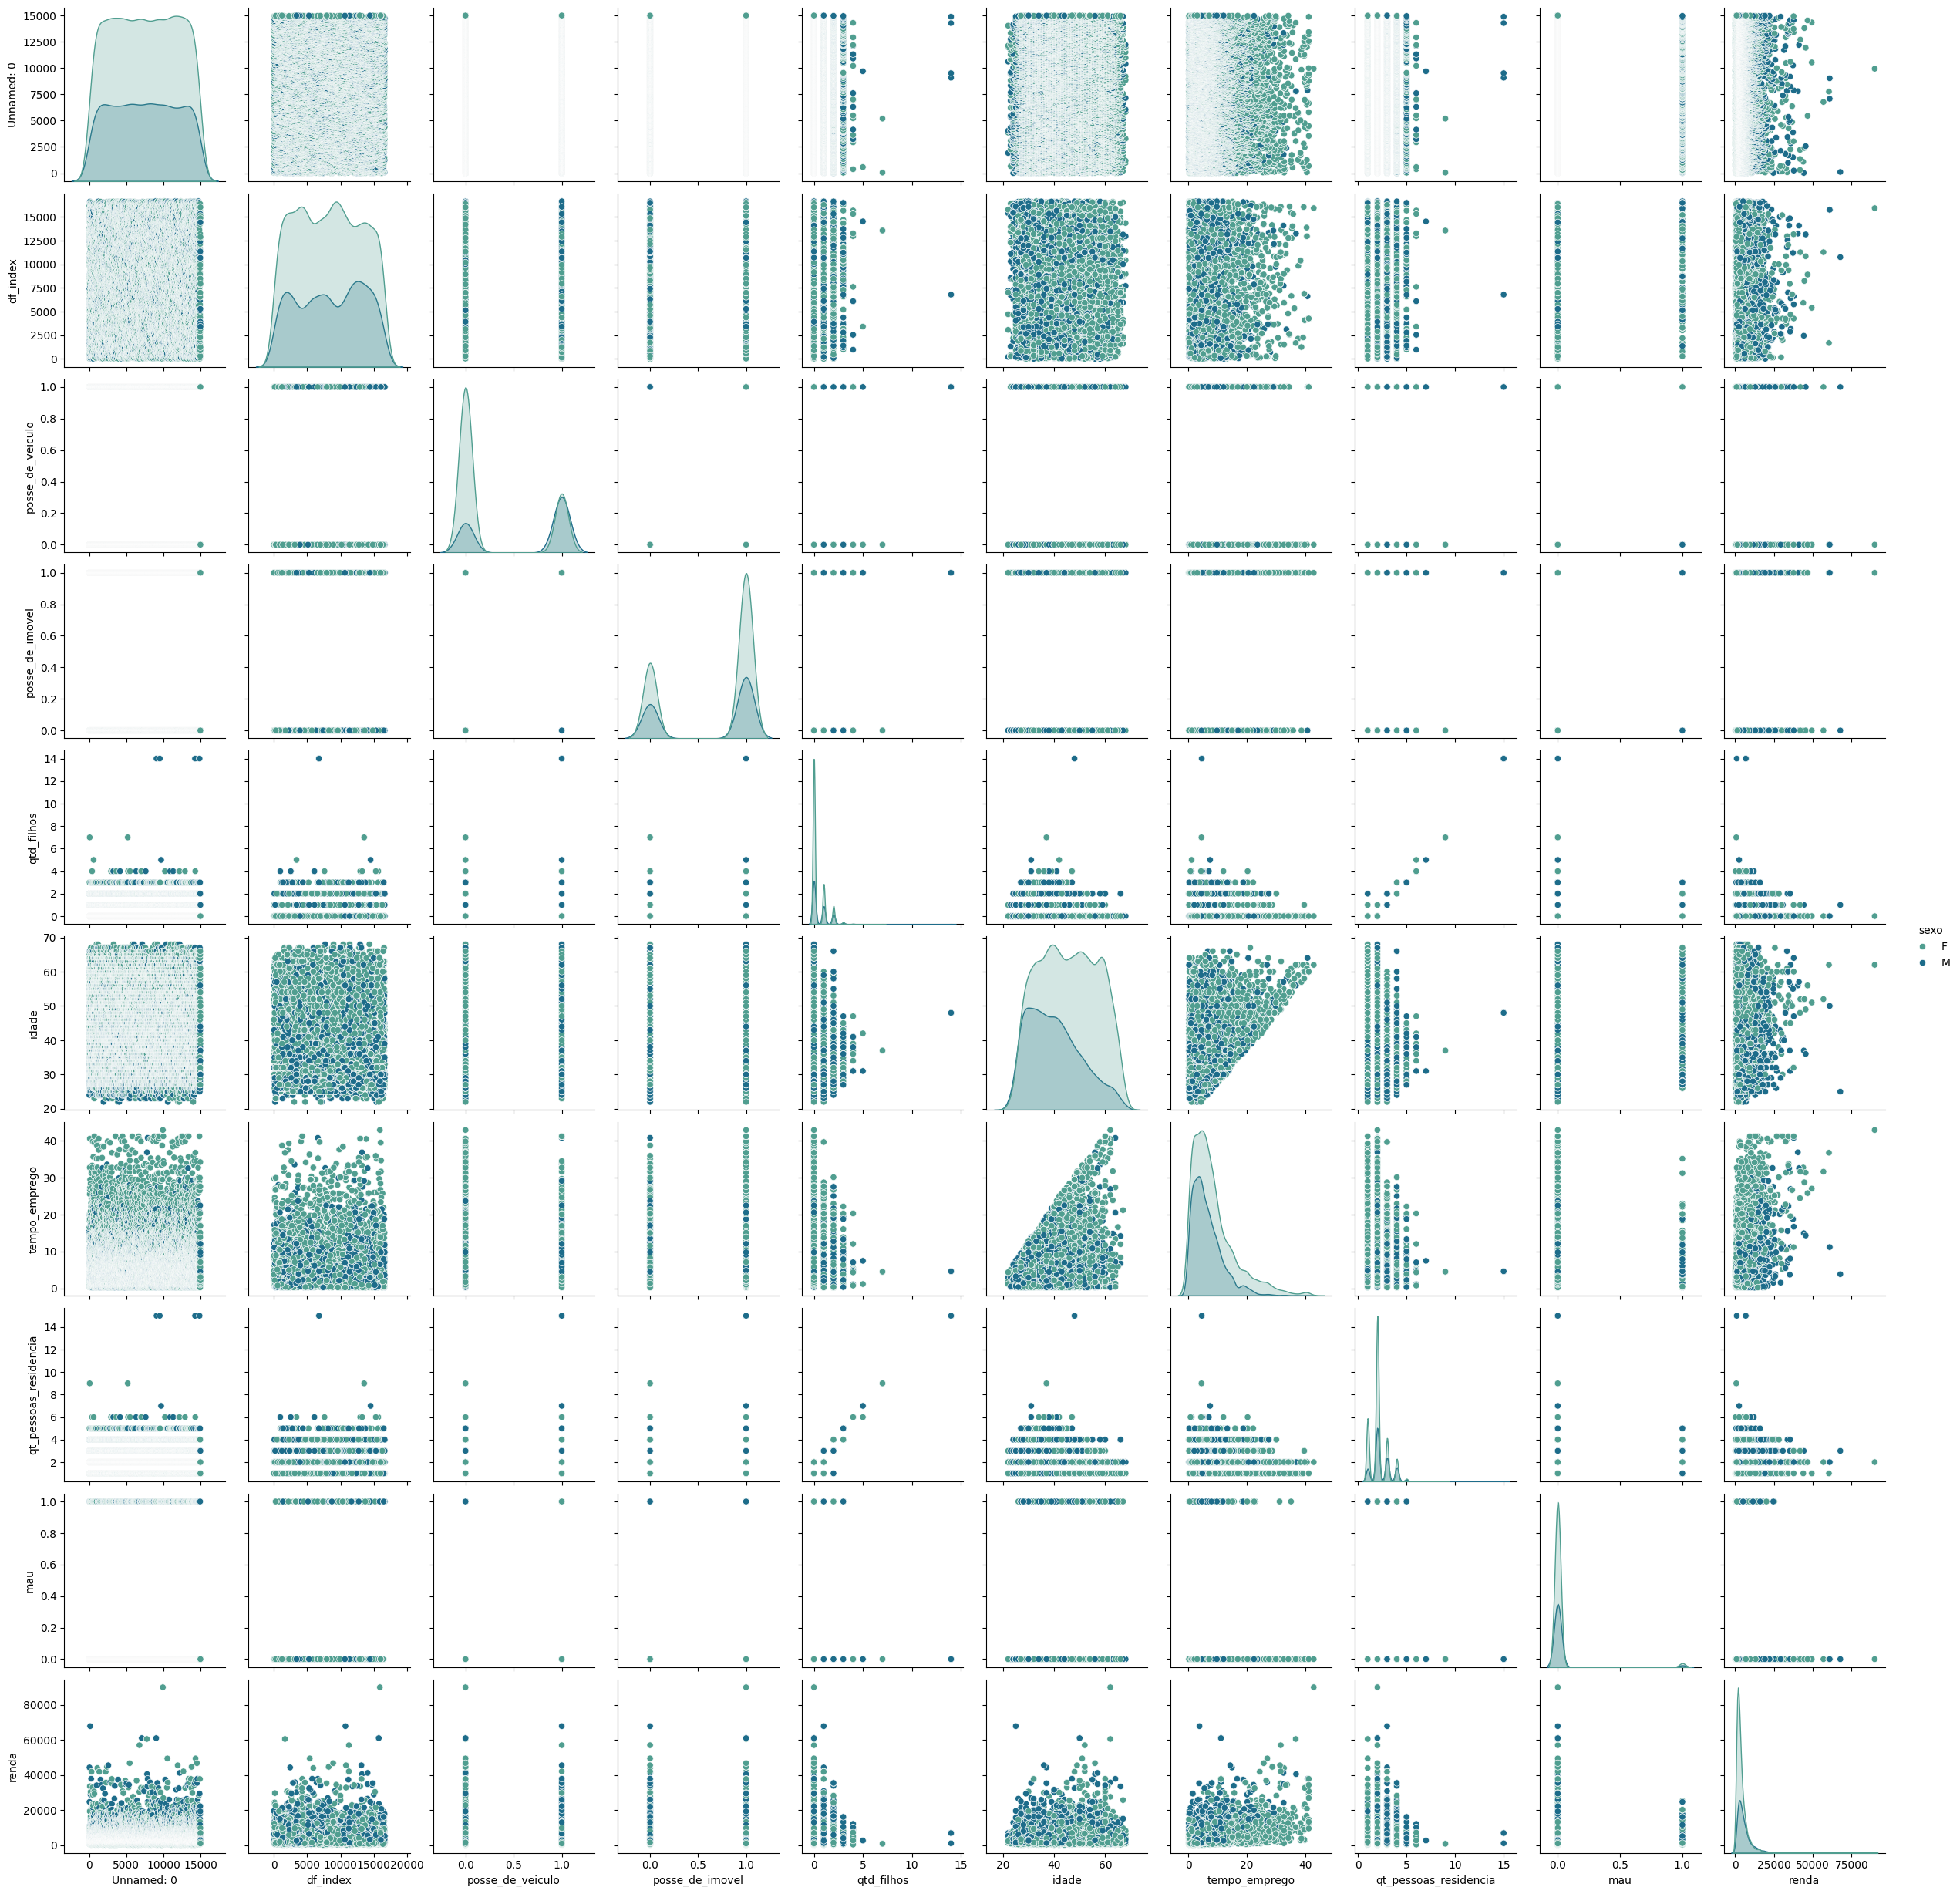

In [11]:
sns.pairplot(data=renda,palette="crest",hue='sexo');

<Axes: >

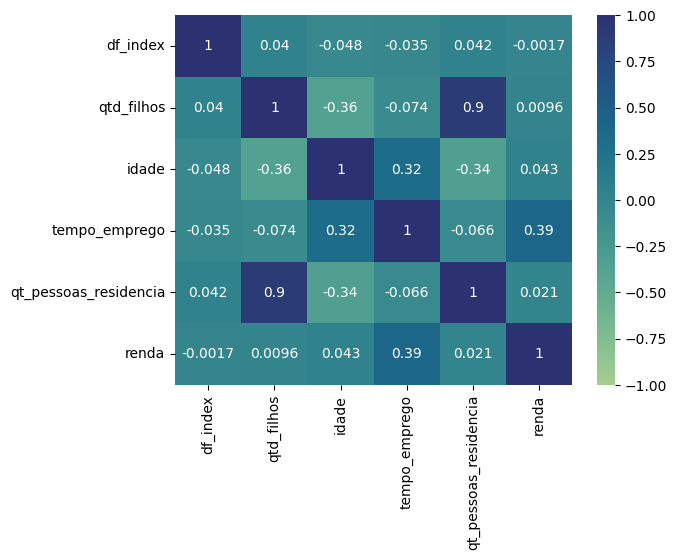

In [12]:
sns.heatmap(data=renda.select_dtypes(['float','int']).drop(columns='Unnamed: 0').corr(),cmap='crest',vmin=-1,center=0,vmax=1,annot=True)

Como nossa variável target é a renda, vamos plotar algumas classificações pela renda

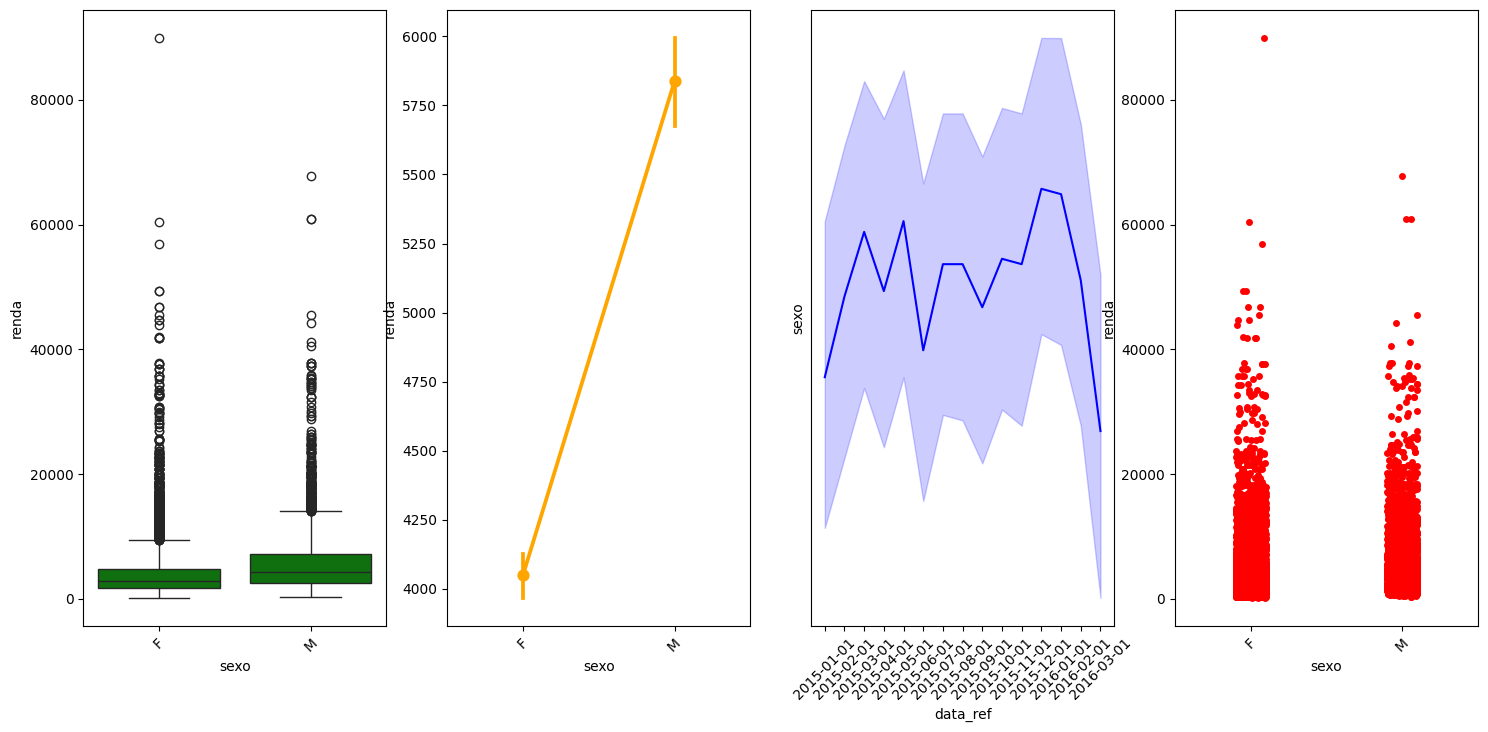

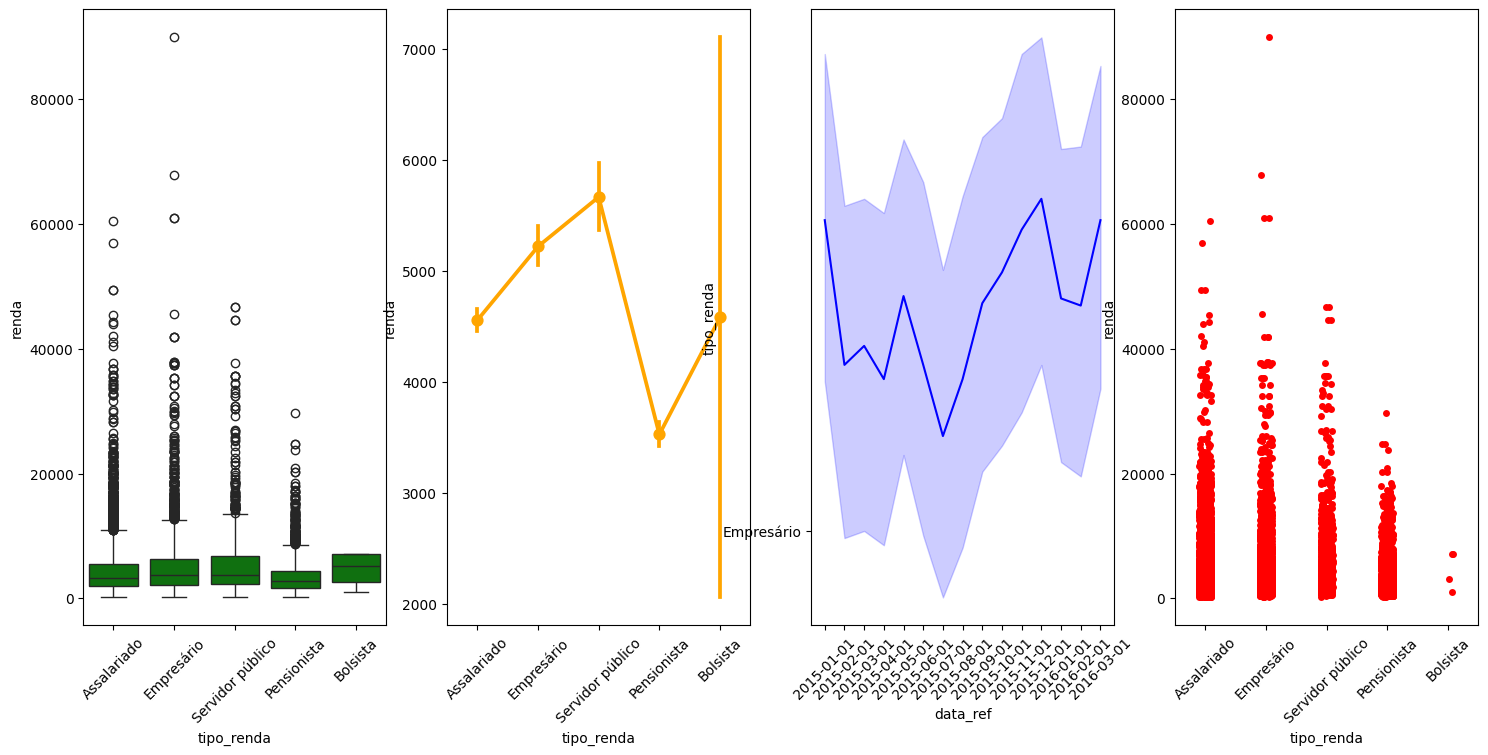

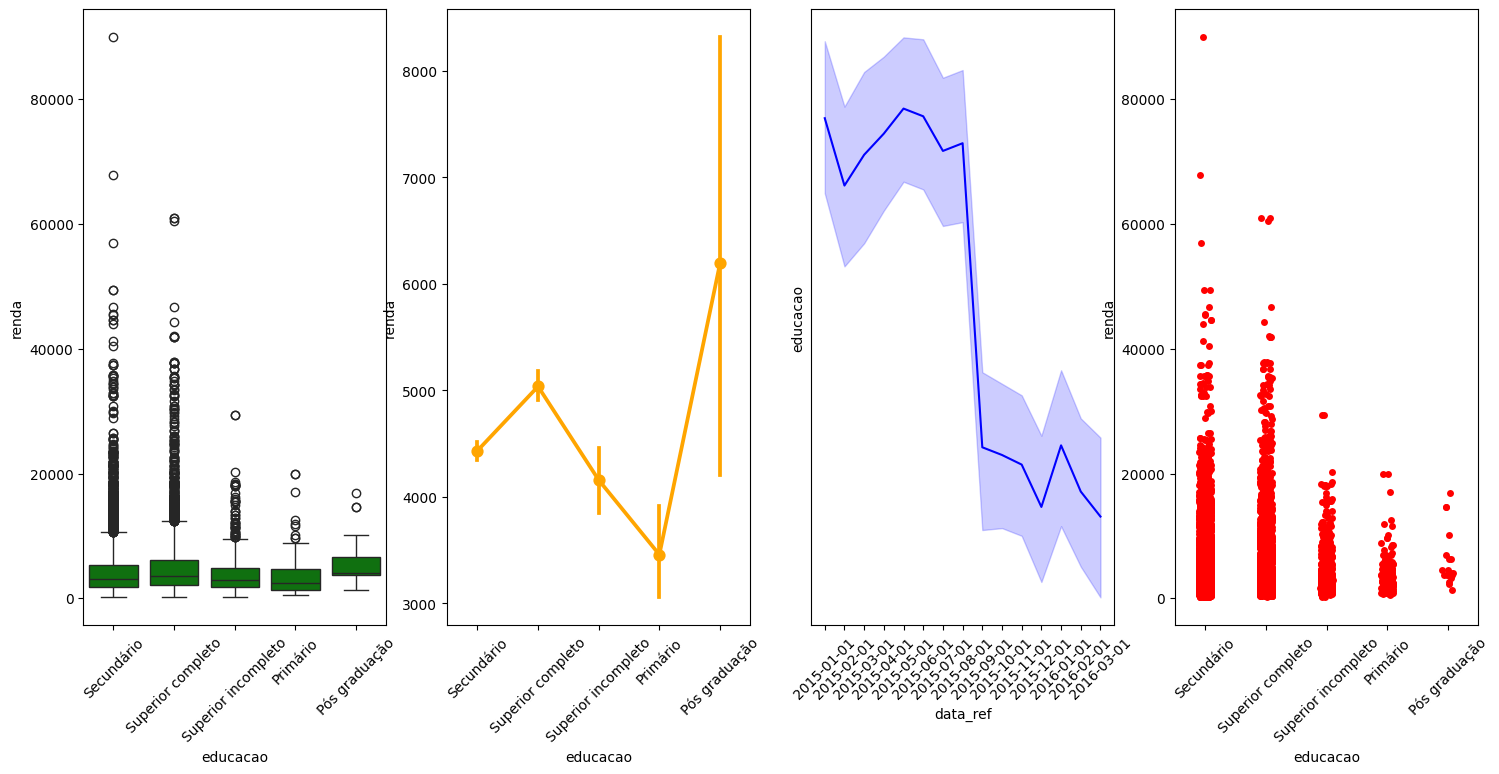

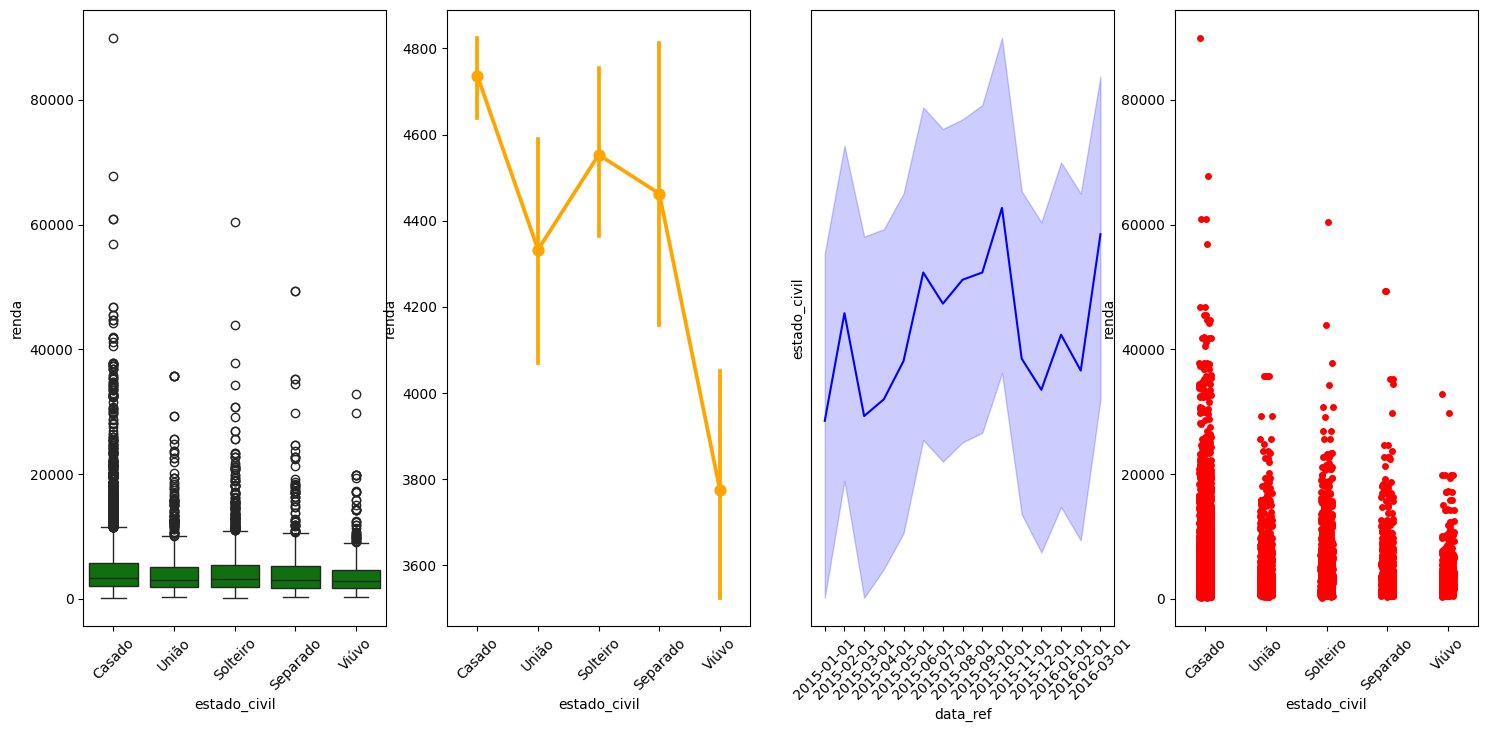

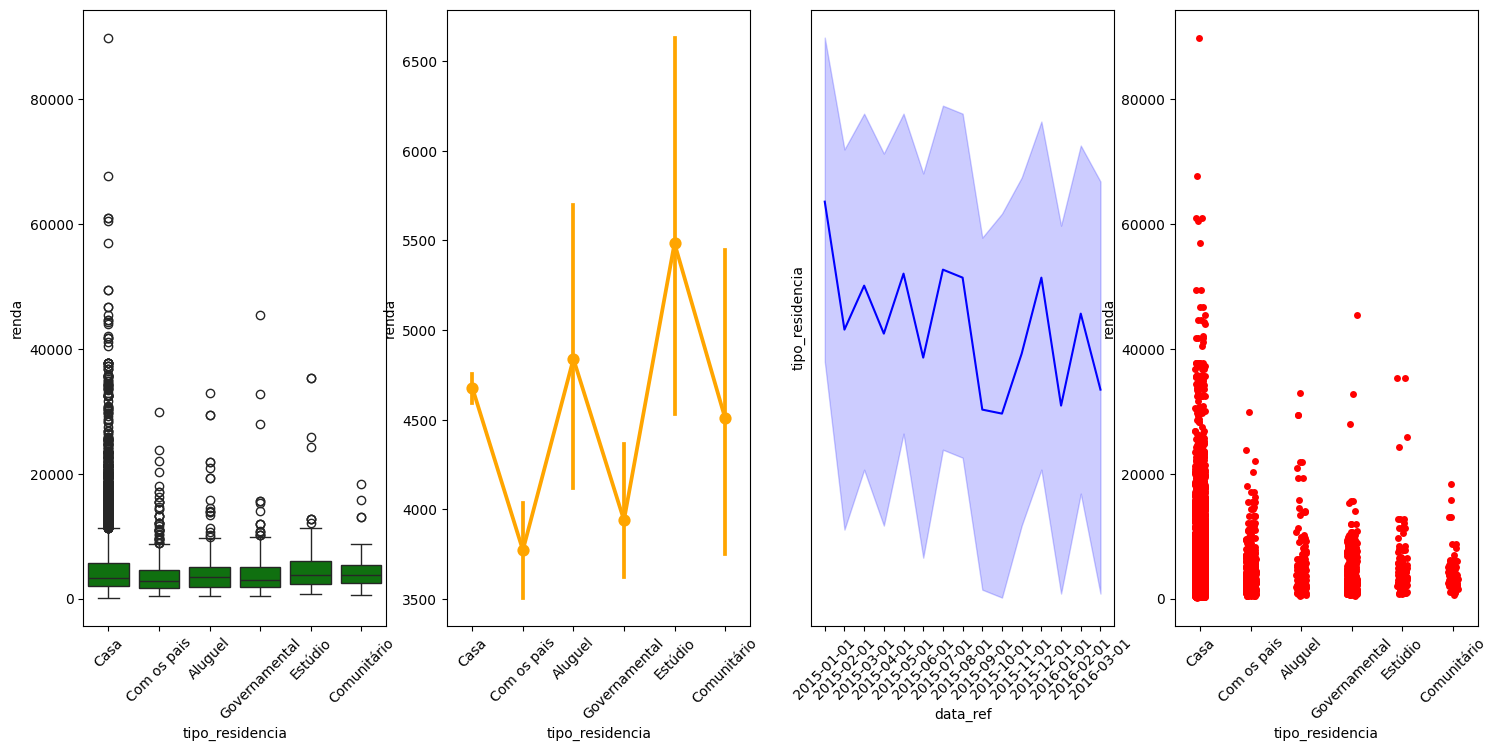

In [13]:
import warnings

# Suprimir avisos específicos de UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

aux = renda.drop(columns='data_ref').select_dtypes(['object']).columns.tolist()


for row in aux:
    fig,ax = plt.subplots(ncols=4,figsize=(18, 8))
    sns.boxplot(data=renda , x=row , y='renda',ax=ax[0],color='green')  
    sns.pointplot(data=renda,x=row,y='renda',ax=ax[1],color='orange')
    sns.lineplot(data=renda,x='data_ref',y=row,color='blue',ax=ax[2])
    sns.stripplot(data=renda , x=row , y='renda',ax=ax[3],color='r')
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
    ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)
    ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=45)

## Etapa 3 Crisp-DM: Data preparation
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [14]:
renda.head(5)

Unnamed: 0    data_ref  df_index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01      8682    F             False             True   
1           1  2015-01-01     12830    M              True             True   
2           2  2015-01-01      2885    M              True             True   
3           3  2015-01-01     16168    F              True            False   
4           4  2015-01-01     12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    mau    renda  
0     36       3.575342                    3.0  False  3369.24  
1     42       0.860274                    2.0  False  6096.14  
2     31       8.065753                    4.0  False  5658.98  
3     50       1.208219                    2.0  False  7246.69  
4     52      13.873973                    2.0  False  4017.37

#### Renomeando a coluna `df_index para → index`

In [15]:
renda.rename(columns={'df_index':'index'},inplace=True)

#### Dropando a coluna `Unnamed` que é insignificante

In [16]:
renda.drop(columns='Unnamed: 0',inplace=True)

#### Agora começa de fato as alterações em tipos de dados e tratamento
**Começando pela coluna `sexo` a qual passamos para valores binários**

In [17]:
renda['sexo'] = renda['sexo'].map({'F':0,'M':1})

#### Deixando a coluna de tempo no formato datetime

In [18]:
renda['data_ref'] = pd.to_datetime(renda['data_ref']) 

#### Função que transforma os dados booleando em dados binários

In [19]:
def bool_to_int(df):
    columns = df.select_dtypes('bool').columns.tolist()
    for col in columns:
        df[col] = df[col].astype(int)
    return 

bool_to_int(renda)

#### Função que cria nossac variáveis dummies

In [20]:
def creating_dummies(df):
    columns = df.select_dtypes('object').columns.tolist()
    df = pd.get_dummies(df,columns=columns,drop_first=True)
    bool_to_int(df)
    return df  
    
renda = creating_dummies(renda)

#### Aqui tratamos a coluna ``tempo_emprego`` que é a única coluna com dados faltates

<Axes: ylabel='tempo_emprego'>

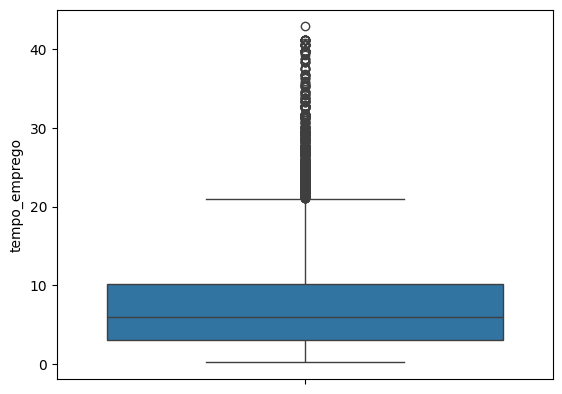

In [21]:
sns.boxplot(data=renda,y='tempo_emprego')

In [22]:
Q1 = renda["tempo_emprego"].quantile(0.25)
Q3 = renda["tempo_emprego"].quantile(0.75)
IQR = Q3 - Q1
outliers = renda[(renda["tempo_emprego"] < (Q1- 1.5*IQR)) | (renda["tempo_emprego"] > (1.5*IQR + Q3))]
print((outliers.shape[0]/renda.shape[0])*100)

4.54


In [23]:
renda["tempo_emprego"].describe()

count    12466.000000
mean         7.750462
std          6.780216
min          0.191781
25%          3.016438
50%          6.016438
75%         10.183562
max         42.906849
Name: tempo_emprego, dtype: float64

Como os outlies de `tempo_emprego` representam pouco mais de 4% da base de dados, acho justo transformar esses dados faltantes da variável `tempo_emprego` pela média, já que é a unica variável que contém dados missings. 


In [24]:
print(f"{round((renda.tempo_emprego.isnull().sum()/renda.shape[0])*100,1)}% de dados missings e que vêm de apenas uma variável")

16.9% de dados missings e que vêm de apenas uma variável


#### Já que 16,9% das linhas contém dados missings vindo dessa coluna, vou passar esses valores missings para a média do tempo de emprego, assim não perdemos quase 20% da nossa base de dados atoa. 

In [25]:
renda.loc[renda["tempo_emprego"].isna(),'tempo_emprego'] = renda.tempo_emprego.mean()

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Vamos testar dois modelos de Machine Learning e ver qual tem o melhor desempenho para nossos dados. 
- Arvores de Regressão
- Regressão Linear multipla

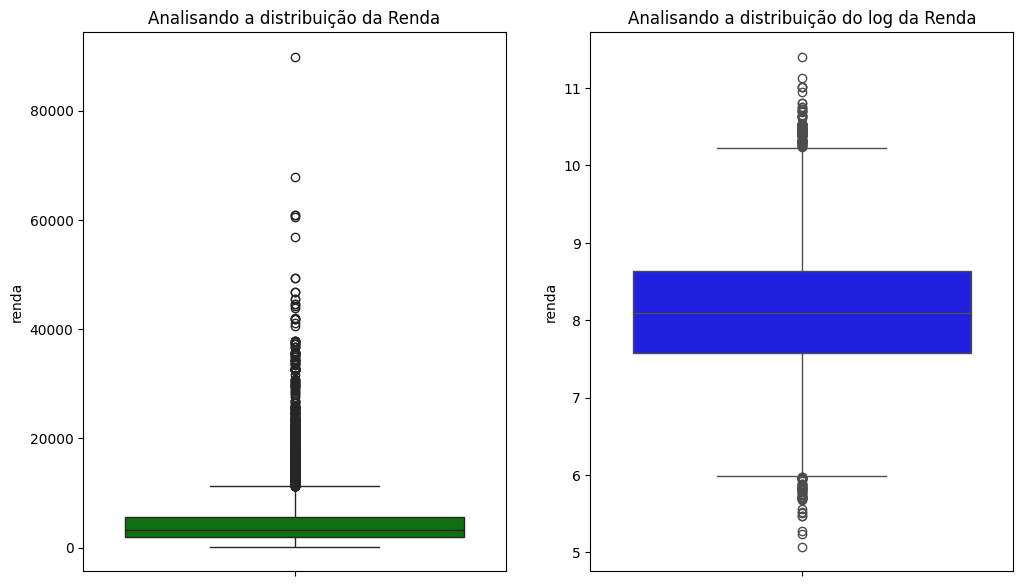

In [26]:
fig,ax = plt.subplots(ncols=2,figsize=(12,7))
sns.boxplot(data=renda,y='renda',ax=ax[0],color='green')
sns.boxplot(data=renda,y=np.log(renda['renda']),ax=ax[1],color='blue')
ax[0].set_title("Analisando a distribuição da Renda")
ax[1].set_title("Analisando a distribuição do log da Renda")
plt.show()
   

In [27]:
# vamos ver se os outliers diminuem ou permanecem semelhantes
Q1 = renda["renda"].quantile(0.25)
Q3 = renda["renda"].quantile(0.75)
IQR = Q3 - Q1
outliers = renda[(renda["renda"] < (Q1- 1.5*IQR)) | (renda["renda"] > (1.5*IQR + Q3))]
outliers.shape[0]

1026

In [28]:
Q1 = np.log(renda["renda"]).quantile(0.25)
Q3 = np.log(renda["renda"]).quantile(0.75)
IQR = Q3 - Q1
outliers = renda[(np.log(renda["renda"]) < (Q1- 1.5*IQR)) | (np.log(renda["renda"]) > (1.5*IQR + Q3))]
outliers.shape[0]


146

**Passando a renda para log podemos ver uma diminuição nos outliers. Então vamos usar a renda em sua escala logarítmica.**
Vou criar uma coluna com o nome `log_renda` para eu não me esquecer que estou tratando de uma escala em log.

### Regressão Linear

In [37]:
renda = renda.assign(log_renda=lambda x: np.log(x['renda']))

In [38]:
X = renda.drop(columns=['data_ref','index','renda','log_renda'])
y = renda[['log_renda']] 

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [39]:
reg1 = sm.OLS(y_train,X_train).fit()
print(reg1.summary())

y_pred_linear = reg1.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'MSE: {mse_linear}')
print(f'R²: {r2_linear}')

                                 OLS Regression Results                                
Dep. Variable:              log_renda   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          5.748e+04
Date:                Tue, 30 Jul 2024   Prob (F-statistic):                        0.00
Time:                        12:32:23   Log-Likelihood:                         -12227.
No. Observations:               11250   AIC:                                  2.450e+04
Df Residuals:                   11225   BIC:                                  2.469e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

**Vou remover algumas variáveis que são estatísticamente insignificantes e que estão mais atrapalhando do que ajudando na nossa previsão. São elas :**
- mau
- tipo_renda_Bolsista
- estado_civil_união
- tipo_residencia_Estúdio

Todas essas variáves têm uma frequência bem discrepante de outras, podemos observar nos gráficos de distribuições que fizemos mais acima.

In [40]:
X = renda.drop(columns=['data_ref','index','renda','log_renda','mau','tipo_renda_Bolsista','estado_civil_União','tipo_residencia_Estúdio'])
y = renda[['log_renda']] 

# Adicionar uma constante ao modelo
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

reg2 = sm.OLS(y_train,X_train).fit()
print(reg2.summary())

y_pred_linear = reg2.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'MSE: {mse_linear}')
print(f'R²: {r2_linear}')


                                 OLS Regression Results                                
Dep. Variable:              log_renda   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          6.842e+04
Date:                Tue, 30 Jul 2024   Prob (F-statistic):                        0.00
Time:                        12:34:35   Log-Likelihood:                         -12230.
No. Observations:               11250   AIC:                                  2.450e+04
Df Residuals:                   11229   BIC:                                  2.466e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

**Apesar de sabermos que a posse de um veículo pode significar que o sujeito possui uma renda maior, o nosso modelo diz que não está nos ajudanto muito**

Vamos considerar a significância estatística das variáveis restantes no modelo:

- posse_de_veiculo: p-value = 0.742  → Muito alto, indicando que essa variável não é estatisticamente significativa.
- tipo_residencia_Governamental: p-value = 0.049 → Muito próximo do limiar de 0.05, pode ser mantido, mas com cautela.

In [41]:
X = renda.drop(columns=['data_ref', 'index', 'renda', 'log_renda','posse_de_veiculo','tipo_residencia_Governamental', 'mau', 'tipo_renda_Bolsista', 'estado_civil_União', 'tipo_residencia_Estúdio'])
y = renda[['log_renda']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg3 = sm.OLS(y_train, X_train).fit()
print(reg3.summary())

y_pred_linear = reg3.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'MSE: {mse_linear}')
print(f'R²: {r2_linear}')

                                 OLS Regression Results                                
Dep. Variable:              log_renda   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          7.561e+04
Date:                Tue, 30 Jul 2024   Prob (F-statistic):                        0.00
Time:                        12:35:58   Log-Likelihood:                         -12232.
No. Observations:               11250   AIC:                                  2.450e+04
Df Residuals:                   11231   BIC:                                  2.464e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

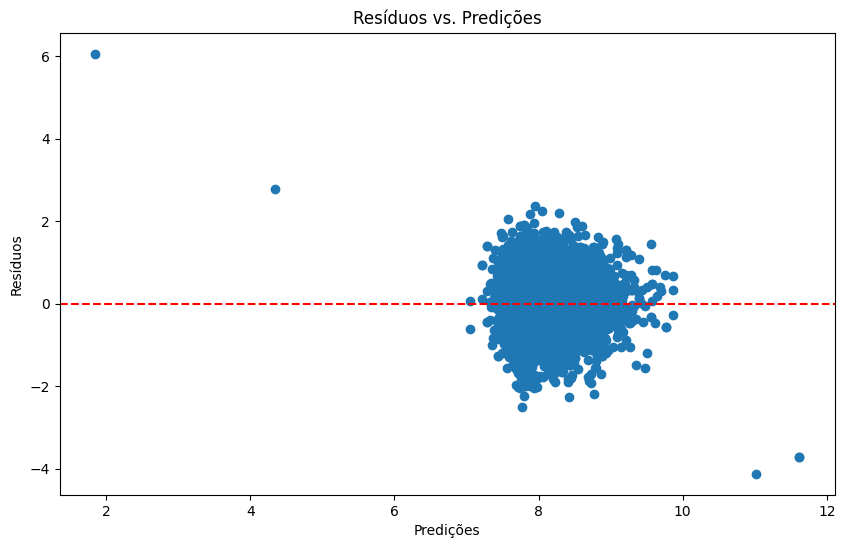

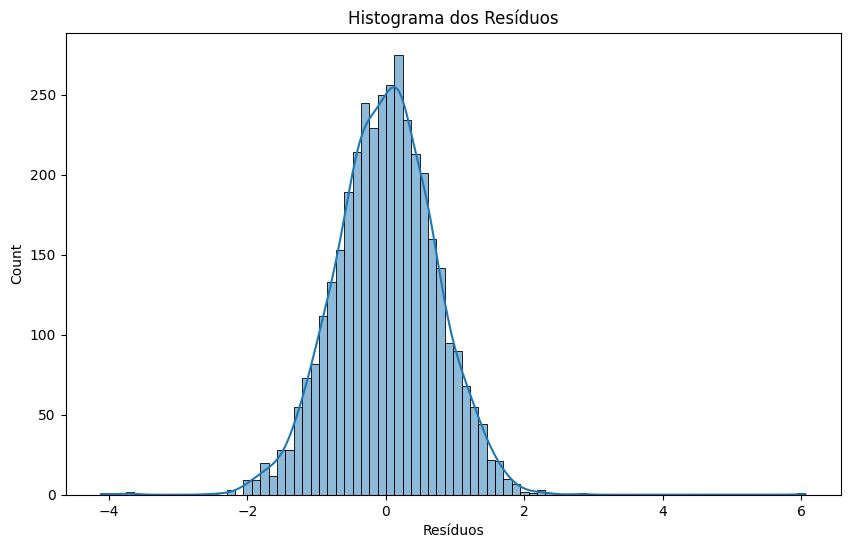

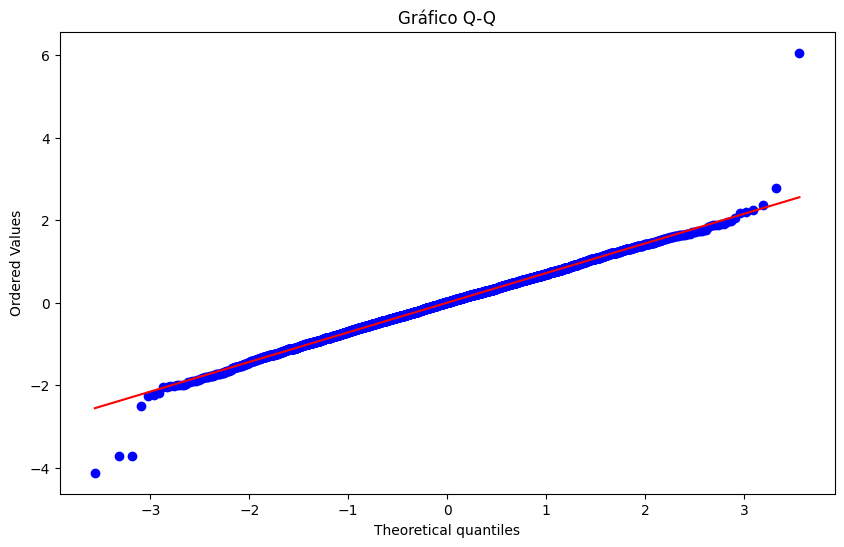

In [34]:
# Resíduos
residuos = y_test.squeeze() - y_pred_linear

# Gráfico de Resíduos vs. Predições
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predições')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Predições')
plt.show()

# Histograma dos Resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

# Gráfico Q-Q
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Gráfico Q-Q')
plt.show()


**Tivemos uma diminuição na acurácia/r2 da nossa regressão, vamos tentar um modelo melhor com a arvore de regressão.**

Porém pela análise de resíduos podemos observar que possuímos alguns outliers

### Árvores de regressão

In [35]:
from sklearn.tree import DecisionTreeRegressor

X = renda.drop(columns=['data_ref', 'index', 'renda', 'log_renda'])
y = renda[['renda']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Árvore de Regressão:")
print(f'MSE: {mse_tree}')
print(f'MAE: {mae_tree}')
print(f'RMSE: {rmse_tree}')
print(f'R²: {r2_tree}')

Árvore de Regressão:
MSE: 17666573.24581896
MAE: 2456.5762463613996
RMSE: 4203.16229115876
R²: 0.15138767764923622


#### Tentativa de melhoria do modelo

In [36]:
from sklearn.model_selection import GridSearchCV

# Definir os parâmetros para busca
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Criar o modelo
tree = DecisionTreeRegressor(random_state=0)

# Buscar
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_tree = grid_search.best_estimator_

# Previsões e avaliação
y_pred_tree_best = best_tree.predict(X_test)
mse_tree_best = mean_squared_error(y_test, y_pred_tree_best)
mae_tree_best = mean_absolute_error(y_test, y_pred_tree_best)
rmse_tree_best = np.sqrt(mse_tree_best)
r2_tree_best = r2_score(y_test, y_pred_tree_best)

print("Melhor Árvore de Regressão:")
print(f'MSE: {mse_tree_best}')
print(f'MAE: {mae_tree_best}')
print(f'RMSE: {rmse_tree_best}')
print(f'R²: {r2_tree_best}')


Melhor Árvore de Regressão:
MSE: 15962324.317389945
MAE: 2568.3142351562274
RMSE: 3995.2877640277607
R²: 0.2332511279570214


## Etapa 5 Crisp-DM: Evaluation

Nesta etapa, avaliamos o desempenho dos modelos desenvolvidos durante o projeto. Foram utilizados dois métodos de regressão para prever a renda: Regressão Linear e Árvore de Regressão. A seguir, apresentamos uma análise detalhada dos resultados obtidos com cada um dos modelos

### Regressão Linear
Para a Regressão Linear, foram utilizados os dados de treino e teste divididos de forma aleatória. O modelo foi ajustado com todas as variáveis disponíveis, exceto data_ref, index, renda e log_renda. Abaixo estão os resultados da avaliação do modelo

**Primeiro modelo:**
- MSE: 0.5191215462791032
- R²: 0.19174625345228036

**Segundo modelo:**

- MSE: 0.5191387016034598
- R²: 0.19171954322365703

**Terceiro modelo:**


- MSE: 0.5199711096924652
- R²: 0.19042351349532527

### Arvores de decisão:

**Primeiro modelo**:
- MSE: 17666573.24581896
- MAE: 2456.5762463613996
- RMSE: 4203.16229115876
- R²: 0.15138767764923622

**Segundo Modelo:**
- MSE: 15962324.317389945
- MAE: 2568.3142351562274
- RMSE: 3995.2877640277607
- R²: 0.2332511279570214

### Conclusões
Os resultados mostram que a Regressão Linear e a Árvore de Regressão inicial apresentaram um desempenho similar, com valores de MSE relativamente altos e baixos valores de r2, indicando que ambos os modelos têm limitações na capacidade de explicar a variabilidade da renda.

A busca em grade para a Árvore de Regressão melhorou um pouco o desempenho do modelo, reduzindo o MSE e o RMSE e aumentando o R². No entanto, os valores ainda sugerem que há espaço para melhorias.

Para próximos passos, seria interessante explorar outros modelos de machine learning, e realizar um trabalho mais profundo na engenharia de features e pré-processamento dos dados para tentar obter melhores resultados.

## Etapa 6 Crisp-DM: Deploy

Nesta etapa, vamos colocar o modelo desenvolvido em uso. Para isso, criarei um aplicativo web interativo utilizando Streamlit. Este app permitirá que os usuários carreguem novos dados, façam previsões de renda e visualizem os resultados de forma intuitiva.

Além disso, todo o projeto será publicado no GitHub, facilitando o acesso ao código, as análises e permitindo colaborações futuras. Isso garante que o modelo não apenas seja funcional, mas também acessível e facilmente utilizável em um ambiente real.